In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.


In [2]:
model = ResNet50(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [4]:
import matplotlib.pyplot as plt

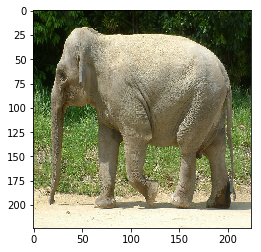

In [5]:
plt.imshow(img)

In [6]:
x.shape

(1, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


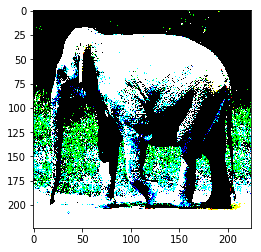

In [7]:
plt.imshow(np.squeeze(x))

In [8]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

Predicted: [('n02504013', 'Indian_elephant', 0.804936), ('n02504458', 'African_elephant', 0.13190717), ('n01871265', 'tusker', 0.057759784)]


In [9]:
import tensorflow as tf; print('TensorFlow Version:', tf.__version__)
import keras; print('Keras Version:', keras.__version__)

TensorFlow Version: 1.13.1
Keras Version: 2.2.4


In [10]:
from keras.models import load_model
import keras.backend as K
from tensorflow.python.framework import graph_io
from tensorflow.python.tools import freeze_graph
from tensorflow.core.protobuf import saver_pb2
from tensorflow.python.training import saver as saver_lib

In [11]:
K.set_learning_phase(0)

In [12]:
sess = K.get_session()

In [13]:
saver = saver_lib.Saver(write_version=saver_pb2.SaverDef.V2)

In [14]:
checkpoint_path = saver.save(sess, 'saved_ckpt', global_step=0, latest_filename='checkpoint_state')

In [15]:
graph_io.write_graph(sess.graph, '.', 'tmp.pb')

'./tmp.pb'

In [16]:
in_names = model.input.op.name
print(in_names)

input_1


In [17]:
out_names = model.output.op.name
print(out_names)

fc1000/Softmax


In [18]:
freeze_graph.freeze_graph('./tmp.pb', '',
                          False, checkpoint_path, out_names,
                          "save/restore_all", "save/Const:0",
                          './frozen_graph.pb', False, "")

Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from saved_ckpt-0
Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 320 variables.
INFO:tensorflow:Converted 320 variables to const ops.


In [19]:
import uff

In [20]:
uff_model = uff.from_tensorflow_frozen_model('frozen_graph.pb', [out_names])

NOTE: UFF has been tested with TensorFlow 1.12.0. Other versions are not guaranteed to work
UFF Version 0.6.3
=== Automatically deduced input nodes ===
[name: "input_1"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: -1
      }
      dim {
        size: 224
      }
      dim {
        size: 224
      }
      dim {
        size: 3
      }
    }
  }
}
]

Using output node fc1000/Softmax
Converting to UFF graph
Converting bn5a_branch1/cond/Merge as custom op: Merge
Converting bn5a_branch1/cond/Switch_1 as custom op: Switch
Converting bn_conv1/keras_learning_phase as custom op: PlaceholderWithDefault
Converting bn4a_branch1/cond/Merge as custom op: Merge
Converting bn4a_branch1/cond/Switch_1 as custom op: Switch
Converting bn3a_branch1/cond/Merge as custom op: Merge
Converting bn3a_branch1/cond/Switch_1 as custom op: Switch
Converting bn2a_branch1/cond/Merge as custom op: Merge
Converting bn2a_

Converting bn4b_branch2a/cond/Merge as custom op: Merge
Converting bn4b_branch2a/cond/Switch_1 as custom op: Switch
Converting bn4b_branch2a/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn4b_branch2a/cond/FusedBatchNorm/Switch_3 as custom op: Switch
Converting bn4b_branch2a/cond/FusedBatchNorm/Switch_2 as custom op: Switch
Converting bn4b_branch2a/cond/FusedBatchNorm/Switch_1 as custom op: Switch
Converting bn4b_branch2a/cond/FusedBatchNorm/Switch as custom op: Switch
Converting bn4b_branch2b/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn4b_branch2b/cond/FusedBatchNorm/Switch_3 as custom op: Switch
Converting bn4b_branch2b/cond/FusedBatchNorm/Switch_2 as custom op: Switch
Converting bn4b_branch2b/cond/FusedBatchNorm/Switch_1 as custom op: Switch
Converting bn4b_branch2b/cond/FusedBatchNorm/Switch as custom op: Switch
Converting bn4b_branch2c/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn4b_branch2c/cond/FusedBatchNorm/Switch_3 as custom

Converting bn5a_branch2b/cond/FusedBatchNorm/Switch_1 as custom op: Switch
Converting bn5a_branch2b/cond/FusedBatchNorm/Switch as custom op: Switch
Converting bn5a_branch2c/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn5a_branch2c/cond/FusedBatchNorm/Switch_3 as custom op: Switch
Converting bn5a_branch2c/cond/FusedBatchNorm/Switch_2 as custom op: Switch
Converting bn5a_branch2c/cond/FusedBatchNorm/Switch_1 as custom op: Switch
Converting bn5a_branch2c/cond/FusedBatchNorm/Switch as custom op: Switch
Converting bn5b_branch2c/cond/Merge as custom op: Merge
Converting bn5b_branch2c/cond/Switch_1 as custom op: Switch
Converting bn5b_branch2b/cond/Merge as custom op: Merge
Converting bn5b_branch2b/cond/Switch_1 as custom op: Switch
Converting bn5b_branch2a/cond/Merge as custom op: Merge
Converting bn5b_branch2a/cond/Switch_1 as custom op: Switch
Converting bn5b_branch2a/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn5b_branch2a/cond/FusedBatchNorm/Switch_3 as

In [21]:
!convert-to-uff frozen_graph.pb

Loading frozen_graph.pb
NOTE: UFF has been tested with TensorFlow 1.12.0. Other versions are not guaranteed to work
UFF Version 0.6.3
=== Automatically deduced input nodes ===
[name: "input_1"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: -1
      }
      dim {
        size: 224
      }
      dim {
        size: 224
      }
      dim {
        size: 3
      }
    }
  }
}
]

=== Automatically deduced output nodes ===
[name: "fc1000/Softmax"
op: "Softmax"
input: "fc1000/BiasAdd"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
]

Using output node fc1000/Softmax
Converting to UFF graph
Converting bn5a_branch1/cond/Merge as custom op: Merge
Converting bn5a_branch1/cond/Switch_1 as custom op: Switch
Converting bn_conv1/keras_learning_phase as custom op: PlaceholderWithDefault
Converting bn4a_branch1/cond/Merge as custom op: Merge
Converting bn4a_branch1/cond/Switch_1 as custom op: Switch


Converting bn4a_branch2a/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn4a_branch2a/cond/FusedBatchNorm/Switch_3 as custom op: Switch
Converting bn4a_branch2a/cond/FusedBatchNorm/Switch_2 as custom op: Switch
Converting bn4a_branch2a/cond/FusedBatchNorm/Switch_1 as custom op: Switch
Converting bn4a_branch2a/cond/FusedBatchNorm/Switch as custom op: Switch
Converting bn4a_branch2b/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn4a_branch2b/cond/FusedBatchNorm/Switch_3 as custom op: Switch
Converting bn4a_branch2b/cond/FusedBatchNorm/Switch_2 as custom op: Switch
Converting bn4a_branch2b/cond/FusedBatchNorm/Switch_1 as custom op: Switch
Converting bn4a_branch2b/cond/FusedBatchNorm/Switch as custom op: Switch
Converting bn4a_branch2c/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn4a_branch2c/cond/FusedBatchNorm/Switch_3 as custom op: Switch
Converting bn4a_branch2c/cond/FusedBatchNorm/Switch_2 as custom op: Switch
Converting bn4a_branch2c/cond

Converting bn4d_branch2c/cond/FusedBatchNorm/Switch as custom op: Switch
Converting bn4e_branch2c/cond/Merge as custom op: Merge
Converting bn4e_branch2c/cond/Switch_1 as custom op: Switch
Converting bn4e_branch2b/cond/Merge as custom op: Merge
Converting bn4e_branch2b/cond/Switch_1 as custom op: Switch
Converting bn4e_branch2a/cond/Merge as custom op: Merge
Converting bn4e_branch2a/cond/Switch_1 as custom op: Switch
Converting bn4e_branch2a/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn4e_branch2a/cond/FusedBatchNorm/Switch_3 as custom op: Switch
Converting bn4e_branch2a/cond/FusedBatchNorm/Switch_2 as custom op: Switch
Converting bn4e_branch2a/cond/FusedBatchNorm/Switch_1 as custom op: Switch
Converting bn4e_branch2a/cond/FusedBatchNorm/Switch as custom op: Switch
Converting bn4e_branch2b/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn4e_branch2b/cond/FusedBatchNorm/Switch_3 as custom op: Switch
Converting bn4e_branch2b/cond/FusedBatchNorm/Switch_2 as

Converting bn5a_branch2c/cond/FusedBatchNorm/Switch as custom op: Switch
Converting bn5b_branch2c/cond/Merge as custom op: Merge
Converting bn5b_branch2c/cond/Switch_1 as custom op: Switch
Converting bn5b_branch2b/cond/Merge as custom op: Merge
Converting bn5b_branch2b/cond/Switch_1 as custom op: Switch
Converting bn5b_branch2a/cond/Merge as custom op: Merge
Converting bn5b_branch2a/cond/Switch_1 as custom op: Switch
Converting bn5b_branch2a/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn5b_branch2a/cond/FusedBatchNorm/Switch_3 as custom op: Switch
Converting bn5b_branch2a/cond/FusedBatchNorm/Switch_2 as custom op: Switch
Converting bn5b_branch2a/cond/FusedBatchNorm/Switch_1 as custom op: Switch
Converting bn5b_branch2a/cond/FusedBatchNorm/Switch as custom op: Switch
Converting bn5b_branch2b/cond/FusedBatchNorm/Switch_4 as custom op: Switch
Converting bn5b_branch2b/cond/FusedBatchNorm/Switch_3 as custom op: Switch
Converting bn5b_branch2b/cond/FusedBatchNorm/Switch_2 as

In [22]:
import tensorrt as trt


In [23]:

TRT_LOGGER = trt.Logger(trt.Logger.WARNING)
model_file = "frozen_graph.uff"



In [24]:
with trt.Builder(TRT_LOGGER) as builder, builder.create_network() as network, trt.UffParser() as parser:
    # Foo
    parser.register_input(in_names, trt.DimsCHW(3, 224, 224), trt.UffInputOrder.NCHW)
    parser.register_output(out_names)

In [ ]:
parser.parse(model_file, network)

In [ ]:
builder.max_workspace_size = 2**30

In [ ]:
engine = builder.build_cuda_engine(network)